In [1]:
import os
import sys
os.chdir('/home/zongchen/mmd_flow_cubature/')
sys.path.append('/home/zongchen/mmd_flow_cubature/')
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from mmd_flow.distributions import Distribution
from mmd_flow.kernels import gaussian_kernel
from mmd_flow.mmd import mmd_fixed_target
from mmd_flow.gradient_flow import gradient_flow

/home/zongchen/miniconda3/envs/mmd_cubature/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
N = 20
d = 2
kernel = gaussian_kernel(1.0)
# k = 20
# temp_key = jax.random.PRNGKey(42)
# means = jax.random.normal(temp_key, shape=(k, d))
# covariances = jnp.stack([jnp.eye(d) * (0.5 + jax.random.uniform(jax.random.split(temp_key, k)[l], shape=(d,))) for l in range(k)])
# weights = jnp.ones(k) / k

k = 2  # Number of Gaussian components
d = 2   # Dimensionality of the Gaussians
means = jnp.array([[5.0, 5.0], [-5.0, -5.0]])
key = jax.random.PRNGKey(42)
covariances = jnp.stack([jnp.eye(d) * (0.5 + jax.random.uniform(jax.random.split(key, k)[l], shape=(d,))) for l in range(k)])

# Assign uniform weights
weights = jnp.ones(k) / k

distribution = Distribution(kernel=kernel, means=means, covariances=covariances, weights=weights)


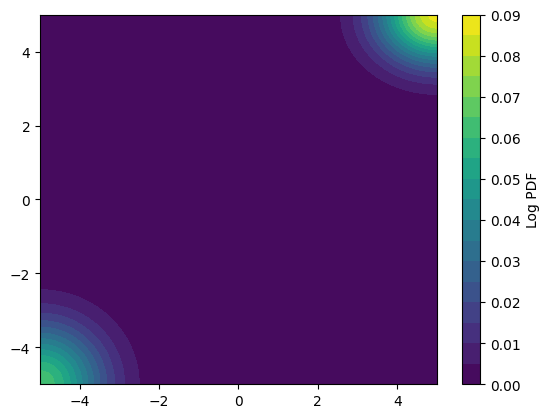

In [3]:
animate_fig, animate_ax = plt.subplots()
# animate_fig.patch.set_alpha(0.)
# plt.axis('off')
# animate_ax.scatter(trajectory.Ys[:, 0], trajectory.Ys[:, 1], label='source')
animate_ax.set_xlim(-5, 5)
animate_ax.set_ylim(-5, 5)
x_range = (-5, 5)
y_range = (-5, 5)
resolution = 100
x_vals = jnp.linspace(x_range[0], x_range[1], resolution)
y_vals = jnp.linspace(y_range[0], y_range[1], resolution)
X, Y = jnp.meshgrid(x_vals, y_vals)
grid = jnp.stack([X.ravel(), Y.ravel()], axis=1)
logpdf = distribution.logpdf(grid).reshape(resolution, resolution)
contour = animate_ax.contourf(X, Y, logpdf, levels=20, cmap='viridis')
plt.colorbar(contour, ax=animate_ax, label="Log PDF")
plt.show()
